In [1]:
import pandas as pd
import numpy as np

In [2]:
train_set = pd.read_csv("../data/train_set_cleaned.csv")
test_set = pd.read_csv("../data/test_set_cleaned.csv")

train_set.head()

,Unnamed: 0,cylinders,weight,acceleration,USA,Europe,Asia,mpg
0,0,-0.861091,-0.665648,-0.241454,0.0,0.0,1.0,23.9
1,1,1.482335,1.499048,-0.028048,1.0,0.0,0.0,14.0
2,2,1.482335,0.877224,-0.774967,1.0,0.0,0.0,17.6
3,3,-0.861091,-0.689024,-0.952805,1.0,0.0,0.0,30.0
4,4,-0.861091,-1.052534,1.394654,0.0,1.0,0.0,30.0


In [3]:
test_set.columns

Index(['Unnamed: 0', 'cylinders', 'weight', 'acceleration', 'USA', 'Europe',
       'Asia', 'mpg'],
      dtype='object')

In [4]:
train_set.columns

Index(['Unnamed: 0', 'cylinders', 'weight', 'acceleration', 'USA', 'Europe',
       'Asia', 'mpg'],
      dtype='object')

In [5]:
X_train = train_set.drop(["mpg","Unnamed: 0"], axis=1)
y_train = train_set["mpg"]

X_test = test_set.drop(["mpg","Unnamed: 0"], axis=1)
y_test = test_set["mpg"]


In [6]:
X_train.head()

,cylinders,weight,acceleration,USA,Europe,Asia
0,-0.861091,-0.665648,-0.241454,0.0,0.0,1.0
1,1.482335,1.499048,-0.028048,1.0,0.0,0.0
2,1.482335,0.877224,-0.774967,1.0,0.0,0.0
3,-0.861091,-0.689024,-0.952805,1.0,0.0,0.0
4,-0.861091,-1.052534,1.394654,0.0,1.0,0.0


### Polynomial Regression

In [7]:
X_train.columns

Index(['cylinders', 'weight', 'acceleration', 'USA', 'Europe', 'Asia'], dtype='object')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [9]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

poly_pipeline = Pipeline(
    [
        ("poly", poly),
        ("model", lin_reg_poly)
        
    ]
)


In [10]:
y_test_pred = lin_reg_poly.predict(X_test_poly)

In [11]:
from sklearn.metrics import root_mean_squared_error

RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)
RMSE

4.00372029450507

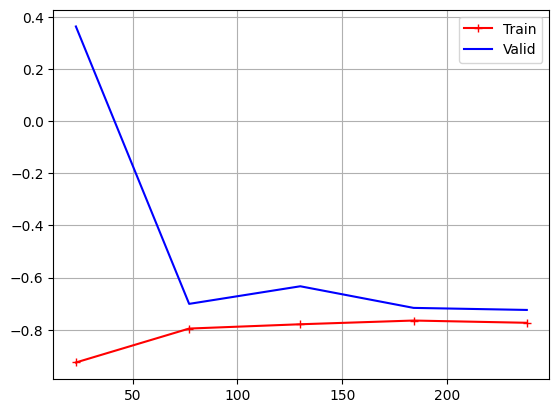

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_train_poly, y_train, cv=5)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="Train")
plt.plot(train_sizes, valid_errors, "b-", label="Valid")
plt.legend()
plt.grid(visible=True)
plt.show()

### Simple Linear Regression

In [13]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train, y_train)
y_test_pred = lin_reg1.predict(X_test)

RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)
RMSE


4.038725153918429

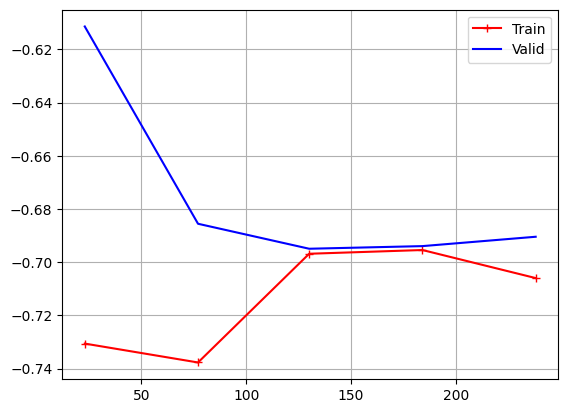

In [14]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_train, y_train, cv=5)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="Train")
plt.plot(train_sizes, valid_errors, "b-", label="Valid")
plt.legend()
plt.grid(visible=True)
plt.show()

### RandomForestRegressor

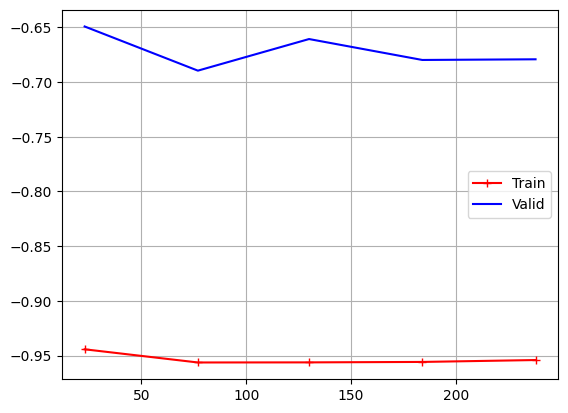

In [15]:
from sklearn.ensemble import RandomForestRegressor

train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(random_state=42), X_train, y_train, cv=5)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="Train")
plt.plot(train_sizes, valid_errors, "b-", label="Valid")
plt.legend()
plt.grid(visible=True)


In [16]:
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train_poly, y_train)
y_test_pred = rf.predict(X_test_poly)

RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)
RMSE


4.027647831551312

### Serialize

In [17]:
import joblib

joblib.dump(poly_pipeline, "../models/polynomial_regression.pkl")

['../models/polynomial_regression.pkl']

In [18]:
df_test_full = X_test.join(y_test)
df_test_full.to_csv("../data/test_set_cleaned.csv")